/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


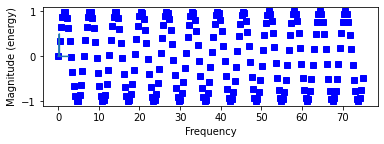

In [ ]:
import numpy as np

import matplotlib.pyplot as plot

time   = np.arange(0, 75, .35);
signalAmplitude   = np.sin(time)
plot.subplot(212)
plot.plot(time, signalAmplitude,'bs')
plot.xlabel('time')
plot.ylabel('amplitude')
plot.subplot(212)
plot.magnitude_spectrum(signalAmplitude,Fs=5)
plot.show()

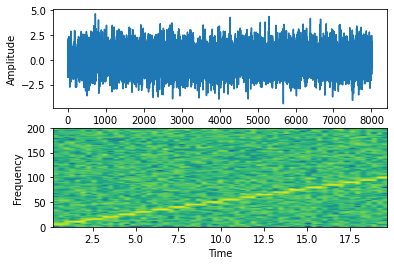

In [ ]:
import matplotlib.pyplot as plot

import numpy as np


frequencies         = np.arange(5,105,5)


samplingFrequency   = 400



s1 = np.empty([0]) # For samples

s2 = np.empty([0]) # For signal



start   = 1


stop    = samplingFrequency+1

 

for frequency in frequencies:

    sub1 = np.arange(start, stop, 1)

    sub2 = np.sin(2*np.pi*sub1*frequency*1/samplingFrequency)+np.random.randn(len(sub1))

  

    s1      = np.append(s1, sub1)

    s2      = np.append(s2, sub2)

   

    start   = stop+1
    stop    = start+samplingFrequency
plot.subplot(211)
plot.plot(s1,s2)
plot.xlabel('Sample')
plot.ylabel('Amplitude')
plot.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(s2, Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.show()   

NameError: ignored

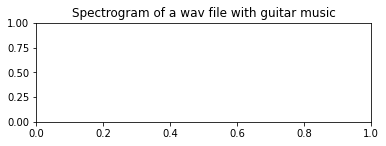

In [ ]:
import matplotlib.pyplot as plot

from scipy.io import wavfile

plot.subplot(211)

plot.title('Spectrogram of a wav file with guitar music')

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.show()

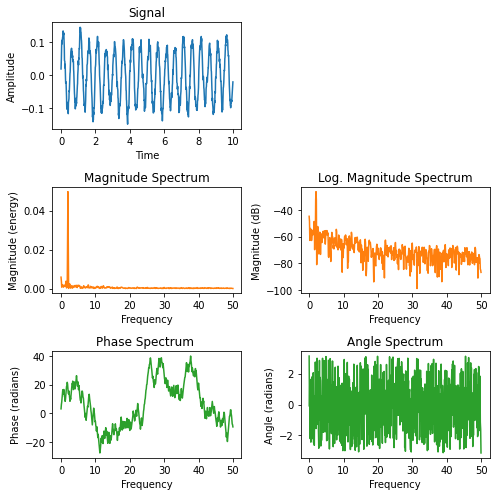

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  
Fs = 1 / dt 
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

model 4


In [ ]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [ ]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

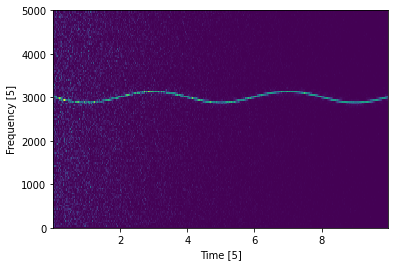

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='red')
plt.ylabel('Frequency [5]')
plt.xlabel('Time [5]')
plt.show()

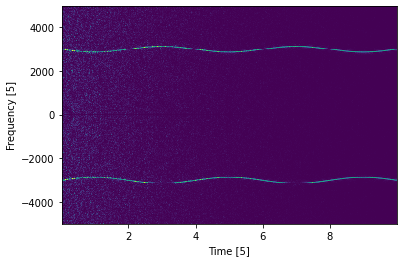

In [ ]:
f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='red')
plt.ylabel('Frequency [5]')
plt.xlabel('Time [5]')
plt.show()